# Experimento 9: _grid search_ e validação com KNN usando FS20

# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [2]:
# Atributos FS20
FS20 = ['medianAD-D3', 'medianAD-D4', 'medianAD-D5', 'medianAD-A5',
        'energy-D3', 'energy-D4', 'energy-D5', 'energy-A5',
        'meanAD-D3', 'meanAD-D4', 'meanAD-A5',
        'kurt-D5', 'kurt-A5', 'skew-D4']


def col_in_fs20(string:str) -> bool:
    for feature in FS20:
        if feature in string:
            return True
    return False


chb_df = pd.read_csv('./chb.csv')

fs20_columns = np.array([col for col in chb_df.columns if col_in_fs20(col)])

groups = chb_df.pop('chb')
y = chb_df.pop('target').values
X = chb_df[fs20_columns].values

In [3]:
results = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            KNeighborsClassifier()),
    param_grid={'kneighborsclassifier__n_neighbors':np.arange(1, 10)},
    cv=GroupKFold(n_splits=24),
    n_jobs=-1
    ).fit(
        X=X,
        y=y,
        groups=groups
        ).cv_results_

results_df = pd.DataFrame(results)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,mean_test_score,std_test_score,rank_test_score
0,1.107513,0.205439,6.170030,3.460751,1,{'kneighborsclassifier__n_neighbors': 1},0.579832,0.629670,0.64125,0.805455,...,0.562500,0.797980,0.588542,0.648810,0.564103,0.551471,0.529412,0.700247,0.111755,9
1,1.124927,0.177939,6.503437,4.088100,2,{'kneighborsclassifier__n_neighbors': 2},0.561975,0.678022,0.60000,0.880000,...,0.535714,0.833333,0.588542,0.613095,0.525641,0.470588,0.544118,0.705748,0.133292,8
2,1.079516,0.160906,6.391419,4.131178,3,{'kneighborsclassifier__n_neighbors': 3},0.579832,0.618681,0.64750,0.852727,...,0.540179,0.863636,0.604167,0.636905,0.564103,0.507353,0.514706,0.717686,0.134177,7
3,1.014381,0.120010,6.441709,3.981887,4,{'kneighborsclassifier__n_neighbors': 4},0.571429,0.662637,0.62375,0.890909,...,0.553571,0.863636,0.572917,0.636905,0.589744,0.529412,0.500000,0.722320,0.134492,6
4,1.110629,0.143975,6.369912,3.967084,5,{'kneighborsclassifier__n_neighbors': 5},0.582983,0.606593,0.66875,0.858182,...,0.562500,0.873737,0.609375,0.642857,0.538462,0.529412,0.529412,0.723061,0.135773,5
5,1.082476,0.151826,6.440885,3.910853,6,{'kneighborsclassifier__n_neighbors': 6},0.578782,0.640659,0.62875,0.887273,...,0.553571,0.883838,0.588542,0.642857,0.564103,0.514706,0.573529,0.726965,0.136908,3
6,1.127101,0.196643,6.343846,3.722627,7,{'kneighborsclassifier__n_neighbors': 7},0.588235,0.607692,0.65000,0.880000,...,0.571429,0.888889,0.604167,0.648810,0.525641,0.492647,0.558824,0.727730,0.143510,2
7,1.031113,0.154697,6.435069,3.832480,8,{'kneighborsclassifier__n_neighbors': 8},0.573529,0.639560,0.63000,0.892727,...,0.553571,0.878788,0.583333,0.625000,0.551282,0.507353,0.544118,0.723742,0.141247,4
8,1.031187,0.169222,6.410554,3.918982,9,{'kneighborsclassifier__n_neighbors': 9},0.584034,0.610989,0.66625,0.894545,...,0.558036,0.893939,0.609375,0.636905,0.544872,0.492647,0.558824,0.729520,0.141992,1


param_kneighborsclassifier__n_neighbors,mean_test_score,std_test_score,rank_test_score
1,0.700247,0.111755,9
2,0.705748,0.133292,8
3,0.717686,0.134177,7
4,0.722320,0.134492,6
5,0.723061,0.135773,5
6,0.726965,0.136908,3
7,0.727730,0.143510,2
8,0.723742,0.141247,4
9,0.729520,0.141992,1


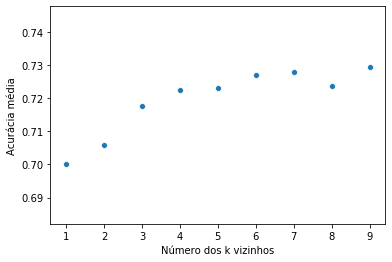

In [4]:
sns.scatterplot(
    data=results_df,
    x='param_kneighborsclassifier__n_neighbors',
    y='mean_test_score'
    ).set(
        xlabel='Número dos k vizinhos',
        ylabel='Acurácia média')

results_df[[
    'param_kneighborsclassifier__n_neighbors',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index()

In [5]:
results_2 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            KNeighborsClassifier()),
    param_grid={'kneighborsclassifier__n_neighbors':np.arange(9, 20)},
    cv=GroupKFold(n_splits=24),
    n_jobs=-1
    ).fit(
        X=X,
        y=y,
        groups=groups
        ).cv_results_

results2_df = pd.DataFrame(results_2)
results2_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,mean_test_score,std_test_score,rank_test_score
0,1.181155,0.203958,6.549523,3.965627,9,{'kneighborsclassifier__n_neighbors': 9},0.584034,0.610989,0.66625,0.894545,...,0.558036,0.893939,0.609375,0.636905,0.544872,0.492647,0.558824,0.729520,0.141992,8
1,1.090401,0.144880,6.553416,3.970156,10,{'kneighborsclassifier__n_neighbors': 10},0.572479,0.643956,0.64750,0.892727,...,0.549107,0.888889,0.593750,0.630952,0.538462,0.500000,0.544118,0.728157,0.144626,11
2,1.039344,0.131243,6.715691,3.978008,11,{'kneighborsclassifier__n_neighbors': 11},0.577731,0.626374,0.66250,0.892727,...,0.549107,0.893939,0.609375,0.636905,0.551282,0.470588,0.529412,0.728802,0.145803,10
3,1.113595,0.135319,6.691913,3.949485,12,{'kneighborsclassifier__n_neighbors': 12},0.569328,0.641758,0.65500,0.892727,...,0.553571,0.893939,0.588542,0.648810,0.564103,0.477941,0.529412,0.729375,0.145385,9
4,1.130687,0.312906,7.096255,4.840284,13,{'kneighborsclassifier__n_neighbors': 13},0.573529,0.629670,0.66750,0.889091,...,0.562500,0.898990,0.614583,0.636905,0.557692,0.485294,0.514706,0.730293,0.144404,6
5,0.935239,0.176524,5.653491,3.002701,14,{'kneighborsclassifier__n_neighbors': 14},0.568277,0.648352,0.64875,0.894545,...,0.553571,0.904040,0.598958,0.642857,0.564103,0.492647,0.514706,0.730892,0.145383,5
6,1.066288,0.160607,6.102234,3.940632,15,{'kneighborsclassifier__n_neighbors': 15},0.568277,0.641758,0.66250,0.894545,...,0.549107,0.904040,0.614583,0.648810,0.564103,0.485294,0.514706,0.730184,0.145192,7
7,0.838872,0.081149,5.249193,3.402706,16,{'kneighborsclassifier__n_neighbors': 16},0.567227,0.646154,0.65875,0.896364,...,0.549107,0.904040,0.604167,0.648810,0.570513,0.492647,0.500000,0.732333,0.146735,3
8,0.933434,0.152582,5.566520,3.381105,17,{'kneighborsclassifier__n_neighbors': 17},0.569328,0.627473,0.66625,0.887273,...,0.566964,0.904040,0.614583,0.642857,0.570513,0.500000,0.514706,0.734676,0.145470,2
9,1.037550,0.150055,6.311066,3.346217,18,{'kneighborsclassifier__n_neighbors': 18},0.565126,0.643956,0.65000,0.896364,...,0.540179,0.898990,0.593750,0.648810,0.570513,0.477941,0.514706,0.731461,0.149350,4


param_kneighborsclassifier__n_neighbors,mean_test_score,std_test_score,rank_test_score
9,0.729520,0.141992,8
10,0.728157,0.144626,11
11,0.728802,0.145803,10
12,0.729375,0.145385,9
13,0.730293,0.144404,6
14,0.730892,0.145383,5
15,0.730184,0.145192,7
16,0.732333,0.146735,3
17,0.734676,0.145470,2
18,0.731461,0.149350,4


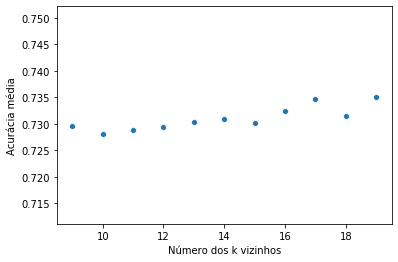

In [6]:
sns.scatterplot(
    data=results2_df,
    x='param_kneighborsclassifier__n_neighbors',
    y='mean_test_score'
    ).set(
        xlabel='Número dos k vizinhos',
        ylabel='Acurácia média')

results2_df[[
    'param_kneighborsclassifier__n_neighbors',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index()

            fs20
count  24.000000
mean    0.735118
std     0.149039
min     0.500000
25%     0.591453
50%     0.757047
75%     0.872635
max     0.921296


fs20
0.570378
0.647253
0.665000
0.889091
0.575581
0.852459
0.866972
0.921296
0.867150
0.900510


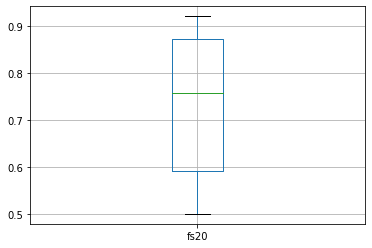

In [10]:
acc_list = []
for train_index, test_index in GroupKFold(n_splits=24).split(X, y, groups):
    # Separando dados
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    acc_list.append(
        make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=19))\
                .fit(X_train, y_train)\
                    .score(X_test, y_test)
    )


knn_df = pd.DataFrame(data=acc_list, columns=['fs20'])
knn_df.to_csv('./02-fs20-knn.csv')

knn_df.boxplot()

print(knn_df.describe())

knn_df.style.hide_index().background_gradient(cmap='Blues')